In [1]:
import sys
sys.path
sys.path.append("../")
sys.path.append("../../")

# Consistency Comparison Notebook

## 1. Introduction

In this notebook, we will demonstrate how to use the `Consistency` class from the `xai-compare` package to evaluate the consistency of different explainers on a specified model. The `Consistency` class helps measure the stability of feature explanations across different data folds.

## 2. Process Overview

The process of evaluating consistency using the `Consistency` class involves several steps, as illustrated in the diagram below:

<img src="../docs/images/Consistency_f.png" alt="Consistency Process" style="width:900px;">

### Step-by-Step Explanation

1. **Model Initialization and Training**:
   - A machine learning model is initialized and trained using the training dataset.

2. **Dataset Splitting**:
   - The dataset is split into multiple folds (e.g., Fold 1, Fold 2, Fold 3).

3. **Applying Explainers**:
   - Same explainers are applied to the model to extract global explanations for each fold (e.g., Explainer 1, Explainer 2, Explainer 3).

4. **Extract and Compare Explanations**:
   - The global explanations extracted by the explainers are compared to evaluate their consistency.

5. **Calculate Standard Deviation**:
   - The standard deviation of the feature impacts is calculated to quantify the consistency of the explanations.

6. **Evaluate Consistency**:
   - The overall consistency score is evaluated based on the standard deviation values.

## 3. Imports and Setup

First, we need to import the necessary libraries and the `Consistency` class from the `xai-compare` package.

In [2]:
from sklearn.ensemble import RandomForestClassifier

from xai_compare.comparison import Consistency
from xai_compare.datasets import diabetes
from xai_compare.config import MODE, EXPLAINERS

## 4. Loading the Data

For this example, we will use the diabetes dataset provided by the `xai-compare` package.

In [3]:
data, target = diabetes()

## 5. Initializing the Model

We will use a Random Forest classifier for our model. You can use any other model as well.

In [4]:
model = RandomForestClassifier(max_depth=4, n_estimators=100, random_state=42)

## 6. Creating the Consistency Object

Now, we will create an instance of the `Consistency` class. We need to provide the model, data, and target labels. Additionally, we can specify other parameters like `mode`, `random_state`, `verbose`, `n_splits`, and `default_explainers`.

In [5]:
consistency = Consistency(
    model=model, 
    data=data, 
    target=target, 
    mode=MODE.CLASSIFICATION,
    random_state=42, 
    verbose=False, 
    n_splits=5, 
    default_explainers=EXPLAINERS
)

## 7. Applying Consistency Measurement and Displaying the Results

The `apply` method measures the consistency of feature explanations across different data folds. This method internally calls the `consistency_measurement` method to calculate the mean and standard deviation of feature impacts for each explainer.

After applying the consistency measurement, we can display the results using the `display` method. This will visualize the mean and standard deviation of feature impacts for different explainers and print the consistency scores DataFrame.

Processing folds: 100%|██████████| 5/5 [00:32<00:00,  6.51s/it]


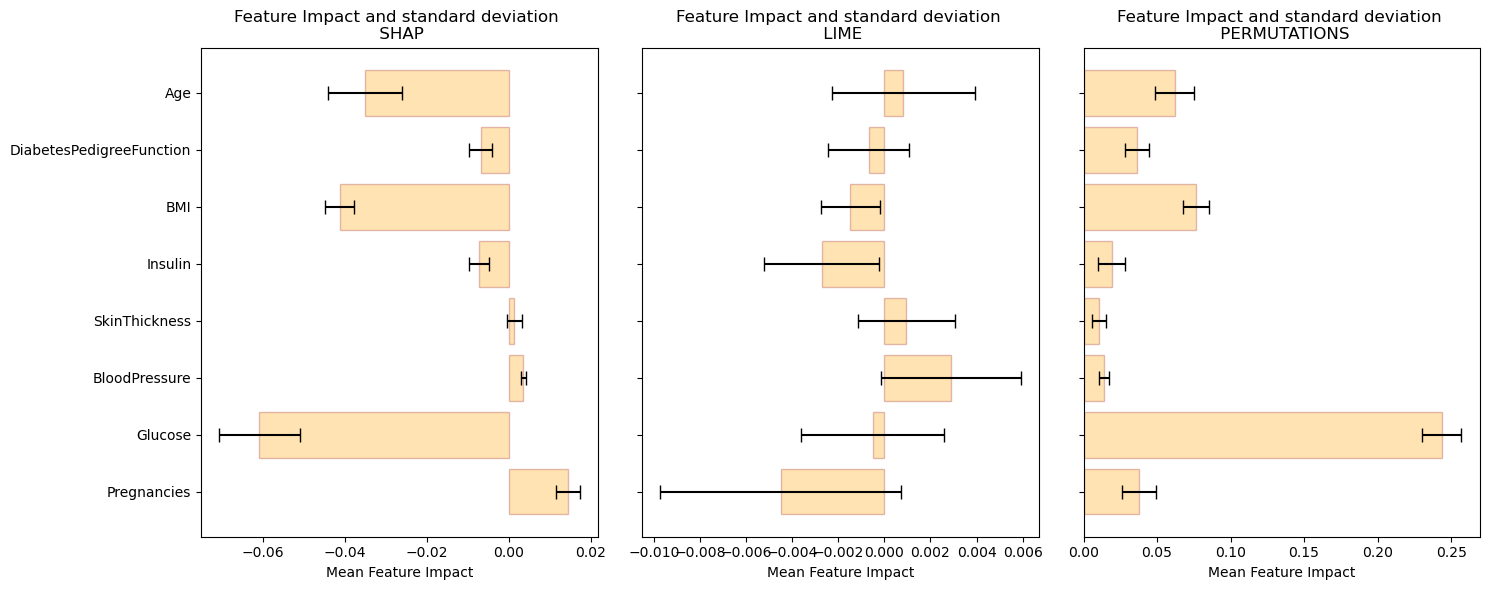

               min_std   max_std  mean_std  median_std
SHAP          0.000581  0.009822  0.004119    0.002800
LIME          0.001281  0.005216  0.002760    0.002769
Permutations  0.003331  0.013332  0.009073    0.009063


In [6]:
consistency.apply()
consistency.display()

## 8. Visualizing Consistency

The `visualize_consistency` method can be called directly to visualize the mean and standard deviation of feature impacts for different explainers.

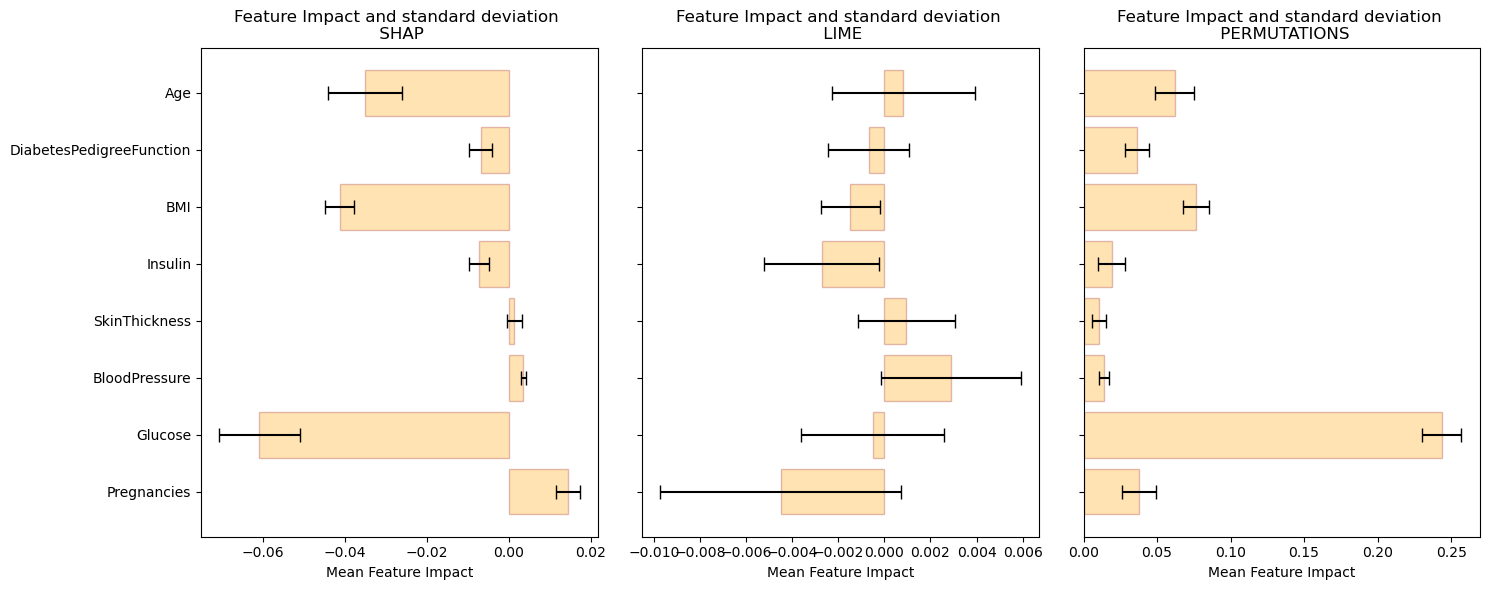

In [7]:
consistency.visualize_consistency()

## 9. Consistency Scores DataFrame

The `consistency.scores` attribute contains the summary statistics of feature impact standard deviations for each explainer. We can print or analyze this DataFrame further.

In [8]:
print(consistency.scores)

               min_std   max_std  mean_std  median_std
SHAP          0.000581  0.009822  0.004119    0.002800
LIME          0.001281  0.005216  0.002760    0.002769
Permutations  0.003331  0.013332  0.009073    0.009063


## 10. Customizing the Consistency Class

The `Consistency` class can be customized by passing different parameters during initialization. For example, you can specify a custom explainer, use stratified folds, or change the number of splits.

### Custom Explainer

You can provide a custom explainer by passing it to the `custom_explainer` parameter during initialization.

In [9]:
# custom_explainer = YourCustomExplainer
consistency_custom = Consistency(
    model=model, 
    data=data, 
    target=target, 
    mode=MODE.CLASSIFICATION,
    random_state=42, 
    verbose=True, 
    n_splits=5, 
    default_explainers=EXPLAINERS,
    custom_explainer=MyCustomExplainer
)

NameError: name 'MyCustomExplainer' is not defined

You can read more about using and applying [Custom explainer](../comparison_tests/custom_explainer.ipynb) here.

### Using Stratified Folds

Stratified folds ensure each fold maintains the same class distribution as the original dataset, providing more reliable and consistent performance evaluation, especially for imbalanced classes.
You can use stratified folds for consistency measurement by setting the `stratified_folds` parameter to `True` in the `consistency_measurement` method.

In [ ]:
consistency.consistency_measurement(stratified_folds=True)

## 11. Conclusion

The `Consistency` class from the `xai-compare` package provides a powerful way to evaluate the stability of feature explanations across different data folds. By visualizing and analyzing the consistency scores, you can gain insights into the reliability of different explainers.

### Summary of Functions and Options

- `apply()`: Measures the consistency of feature explanations.
- `display()`: Visualizes and prints the consistency scores.
- `visualize_consistency()`: Visualizes the mean and standard deviation of feature impacts.
- `consistency_measurement()`: Calculates the mean and standard deviation of feature impacts across different folds.
- Customization options: `custom_explainer`, `stratified_folds`, `n_splits`, etc.

By using the `Consistency` class, you can ensure that your model explanations are robust and reliable, which is crucial for making informed decisions based on the model's predictions.